In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from sklearn.metrics import r2_score

#### **Medición del patrón de interferencia con el láser**

In [260]:
wavelength = 0.670 # [$\lambda$]= m
a = 100 # [a]= m
d = 356 # [d]= m

In [261]:
# Carga de datos
single_slit = pd.read_excel(
          "Doble Rendija Datos.xlsx",
          sheet_name="Simple0"
          )
double_slit = pd.read_excel(
          "Doble Rendija Datos.xlsx",
          sheet_name="Doble"
          )


In [262]:

# Posición y voltaje para rendija simple
position_single_slit = (single_slit["x"].
                        astype(float).to_numpy())
voltage_single_slit = (single_slit["mV"].
                        astype(float).to_numpy()) # [voltaje] = mV
position_single_slit *= 1e-1 #  [x]= $\mu$m


position_single_slit = position_single_slit[:-3]
voltage_single_slit = voltage_single_slit[:-3]
error_voltage =np.ones(voltage_single_slit.shape[0]) * 0.1

In [263]:
# Ajuste
def intensity_single_slit(x, A, wave, dx):
  alfa = np.arctan((x-dx)/5e5)
  return A * (np.sinc(alfa *a/wave ))**2

p0 = [max(voltage_single_slit), wavelength, position_single_slit[voltage_single_slit.argmax()]]

popt, pcov = curve_fit(intensity_single_slit, position_single_slit, voltage_single_slit, p0= p0)
y_model = intensity_single_slit(position_single_slit, *popt)

residuals = voltage_single_slit - y_model

sigma_residuals = np.std(residuals)
normalized_residuals = residuals/ sigma_residuals

In [264]:
# Pasar a metros y voltaje
position_single_slit *= 1e-6
y_model /= 1000
voltage_single_slit /= 1000
normalized_residuals /= 1000
error_voltage /= 1000

<ipython-input-271-cfbf0db7fc51>:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


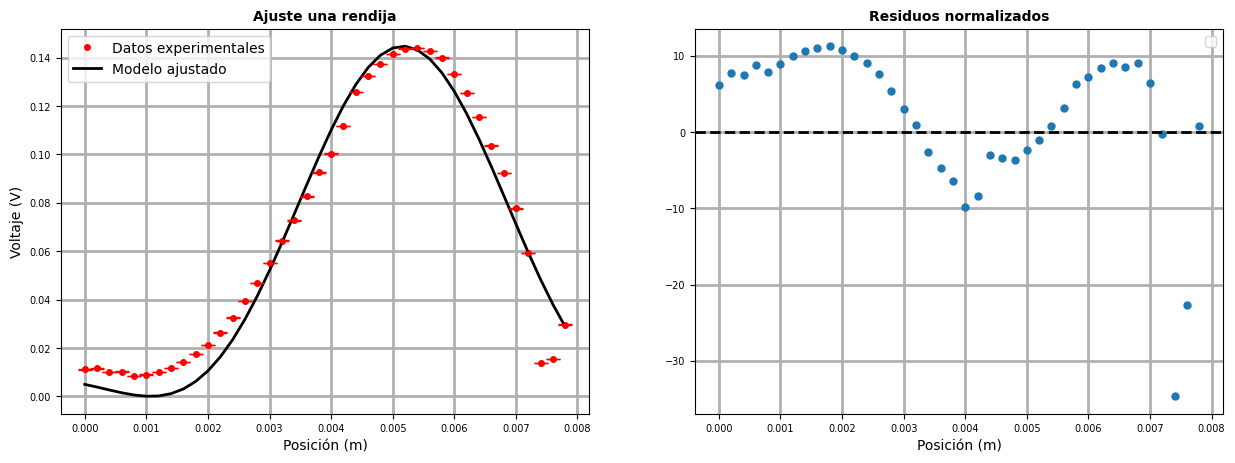

In [271]:
# Gráfica una rendija
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(position_single_slit, voltage_single_slit, "r.", label = "Datos experimentales", markersize = 8)
axes[0].plot(position_single_slit, y_model, 'k-', lw=2, label = "Modelo ajustado")
axes[0].set_ylabel("Voltaje (V)")
axes[0].tick_params(labelsize = 7)
axes[0].errorbar(position_single_slit, voltage_single_slit, fmt="r.", yerr=error_voltage, capsize=5)
axes[0].set_title('Ajuste una rendija',
                  fontsize = 10, fontweight = "bold")
axes[0].grid(linewidth=2)
axes[0].set_xlabel("Posición (m)")
axes[0].legend()

axes[1].plot(position_single_slit,residuals,"o", markersize = 5)
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].tick_params(labelsize = 7)
axes[1].set_title('Residuos normalizados',
                  fontsize = 10, fontweight = "bold")
axes[1].grid(linewidth=2)
axes[1].set_xlabel("Posición (m)")
axes[1].legend()

plt.savefig("Una_rendija.jpeg")


In [272]:
sigmas = np.sqrt(pcov.diagonal())
wavelength_single_sit= popt[1]*1e-6 # [$\lambda$]= $m
sigma_wavelength_single = sigmas[1]*1e-6 # [$\lambda$]= $m

print(f"$\lambda$ = {wavelength_single_sit:.2e} m, $\sigma_\lambda$= {sigma_wavelength_single:.2e}")

$\lambda$ = 8.19e-07 m, $\sigma_\lambda$= 2.11e-08


In [273]:
# Error absoluto
wavelength_teor = wavelength* 1e-6
error_abs = abs(wavelength_single_sit - wavelength_teor)
error_abs

1.4942417324573042e-07

In [274]:
error_abs < 2.5*sigma_wavelength_single

False

In [275]:
#Error porcentual
error_porcent = error_abs / wavelength_teor * 100
error_porcent

22.302115409810508

In [276]:
sigma_wavelength_single/ wavelength_single_sit < 0.1

True

### Doble rendija

In [281]:
# Posición y voltaje para doble rendija
position_double_slit = (double_slit["x"].dropna(). # [x]= $\mu$m
                        astype(float).to_numpy())
voltage_double_slit = (double_slit["mv"].dropna().
                        astype(float).to_numpy()) # [voltaje] = mV


position_double_slit = position_double_slit[1:-120]
voltage_double_slit = voltage_double_slit[1:-120]
error_voltage =np.ones(voltage_double_slit.shape[0]) * 0.1

In [282]:
# Ajuste
def intensity_double_slit(x, dx, A, a, d):
  theta = np.arctan((x-dx)/500000)
  return A * (np.sinc(theta *a/wavelength ))**2 * (np.cos(np.pi * d * theta/ wavelength))**2

p0 =[position_double_slit[voltage_double_slit.argmax()], np.max(voltage_double_slit), a, d]

popt_2, pcov_2 = curve_fit(intensity_double_slit, position_double_slit,voltage_double_slit,p0 )

In [283]:
y_model = intensity_double_slit(position_double_slit, *popt_2)

residuals = voltage_double_slit - y_model
sigma_residuos = np.std(residuals)
normalized_residuals = residuals / sigma_residuos
error_voltage /= 1000

In [284]:
# Pasar a metros y voltios
voltage_double_slit /= 1000 # [x]= V
position_double_slit *= 1e-6 # [x]= m
normalized_residuals /=1000 # [x]= V
y_model /= 1000 # [x]= V


<ipython-input-289-c56ddf003916>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axes[0].plot(position_double_slit, y_model, 'k-', c= "k", lw=2, label ="Modelo Ajustado")


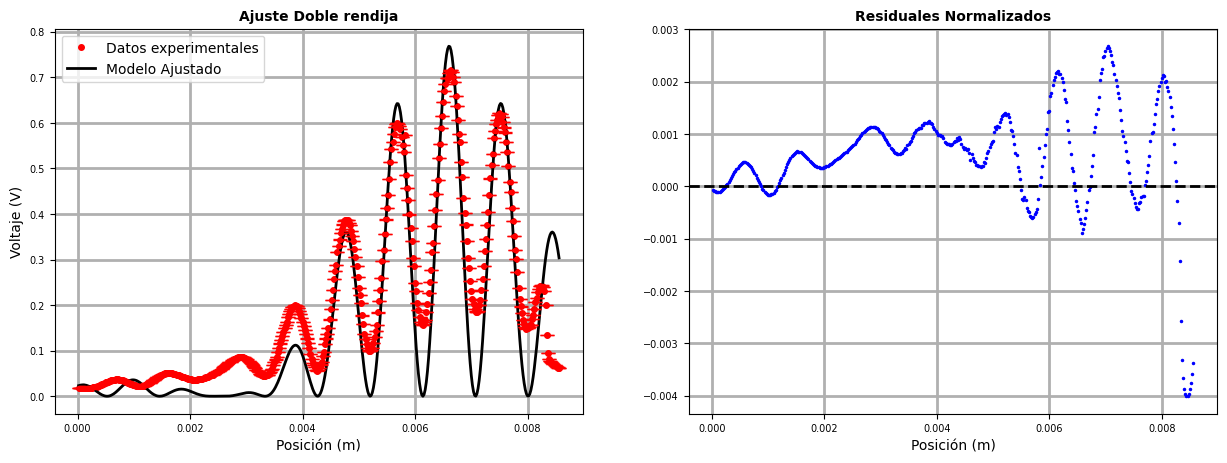

In [289]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(position_double_slit, voltage_double_slit,"r.", label = "Datos experimentales", markersize = 8)
axes[0].plot(position_double_slit, y_model, 'k-', c= "k", lw=2, label ="Modelo Ajustado")
axes[0].set_xlabel("Posición (m)")
axes[0].set_ylabel("Voltaje (V)")
axes[0].set_title('Ajuste Doble rendija',
                  fontsize = 10, fontweight = "bold")
axes[0].errorbar(position_double_slit, voltage_double_slit, fmt="r.", yerr=error_voltage, capsize=5)
axes[0].tick_params(labelsize = 7)
axes[0].grid(linewidth=2)
axes[0].legend()

axes[1].plot(position_double_slit,normalized_residuals, "b.", markersize = 3)
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].tick_params(labelsize = 7)
axes[1].set_title('Residuales Normalizados',
                  fontsize = 10, fontweight = "bold")
axes[1].grid(linewidth=2)
axes[1].set_xlabel("Posición (m)")
plt.savefig("Doble rendija.jpeg")

In [237]:
a_double_slit, d_double_slit = popt_2[2]*1e-6, popt_2[3]*1e-6
sigmas = np.sqrt(pcov_2.diagonal())
sigma_a_double, sigma_d_double = sigmas[2]*1e-6, sigmas[3]*1e-6
print(f"a={a_double_slit:.2e} m, d= {d_double_slit:.5f} m, $\sigma_a$= {sigma_a_double:.2e}, $sigma_d$ ={sigma_d_double:.2e}")

a=8.35e-05 m, d= 0.00036 m, $\sigma_a$= 1.92e-06, $sigma_d$ =1.47e-06


In [231]:
def errores_precision(theoric, experimental, sigma):
  prec= "no es preciso"
  exa= "no es exacto"
  abs_error = abs(theoric - experimental)
  porcent_error = abs_error / theoric * 100
  presicion = sigma / theoric
  if  abs_error < 2.5 *sigma:
    exa = "es exacto"
  if presicion < 0.1:
    prec = "es preciso"
  return exa+ ", " + prec + ", " +f"porcentaje de error: {porcent_error:.2f}%"

In [239]:
a *= 1e-6
d *= 1e-6
errores_precision(a, a_double_slit, sigma_a_double)

'no es exacto, es preciso, porcentaje de error: 16.52%'

In [240]:
errores_precision(d, d_double_slit, sigma_d_double)

'es exacto, es preciso, porcentaje de error: 0.59%'

#### **Medición del patrón de interferencia con el bombillo**

In [246]:
# Carga de datos
double_slit = pd.read_excel("Datos doble rendija.xlsx")

In [245]:
# Conteos-posición
position_double_slit = (double_slit["Posicion"].
                        astype(float).to_numpy())
counting_double = (double_slit["Conteos"].
                        astype(float).to_numpy())

In [248]:
counting = np.array([])
position = np.array([])
error = np.array([])
for i in range(0,position_double_slit.shape[0],3):
  mean = np.mean(counting_double[i:i+3])
  std = np.std(counting_double[i:i+3])
  counting = np.append(counting, mean)
  position = np.append(position, position_double_slit[i])
  error = np.append(error, std)

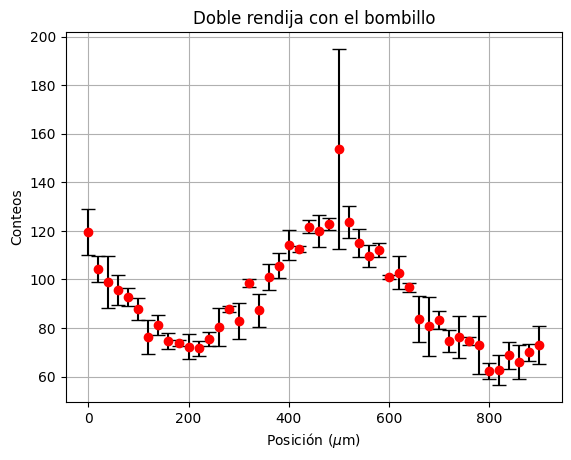

In [259]:
plt.plot(position, counting, "k.", markersize=0.7)
plt.errorbar(position, counting, fmt="o", yerr=error, color='r', ecolor='k', capsize=5)
plt.grid("major")
plt.xlabel("Posición ($\mu$m)")
plt.ylabel("Conteos")
plt.title("Doble rendija con el bombillo")
plt.savefig("Doble rendija counting.jpeg")